In [33]:
%matplotlib inline
from pylab import *
import json

In [34]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

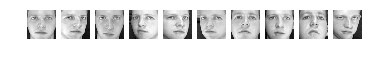

In [35]:
for i in range(10):
    face = faces.images[i]
    subplot(1, 10, i + 1)
    imshow(face.reshape((64, 64)), cmap='gray')
    axis('off')

In [36]:
from ipywidgets import interact, Button
from IPython.display import display, clear_output
class Trainer:
    def __init__(self):
        self.results = {}
        self.imgs = faces.images
        self.index = 0
        
    def increment_face(self):
        if self.index + 1 >= len(self.imgs):
            return self.index
        else:
            while str(self.index) in self.results:
                print (self.index)
                self.index += 1
            return self.index
    
    def record_result(self, smile=True):
        self.results[str(self.index)] = smile
trainer = Trainer()

Button(description='smile', style=ButtonStyle())

Button(description='sad face', style=ButtonStyle())

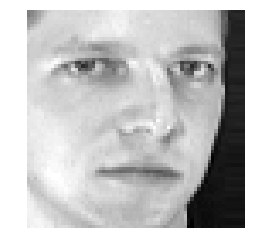

1


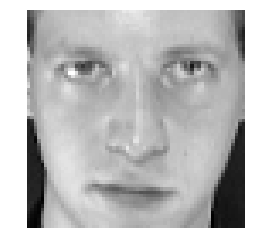

2


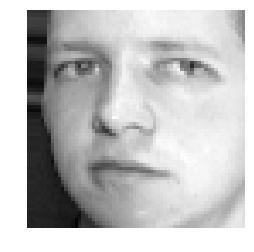

3


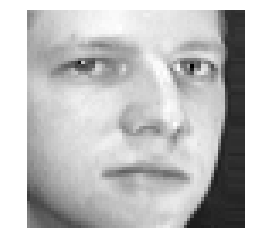

4


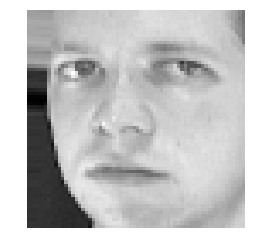

5


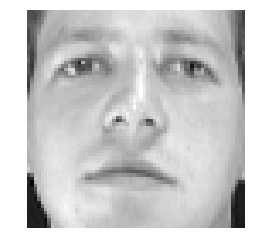

6


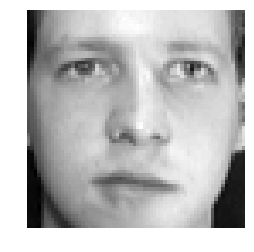

7


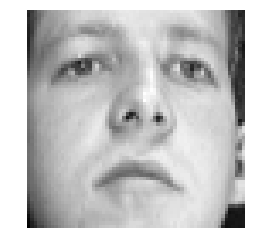

8


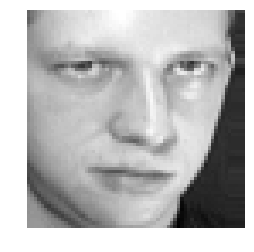

9


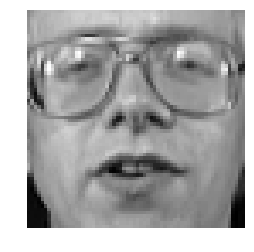

10


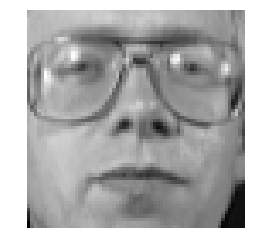

11


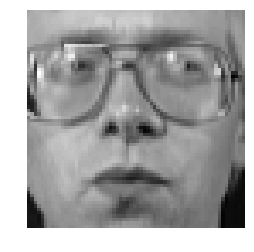

12


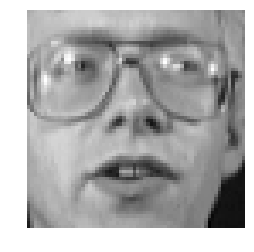

13


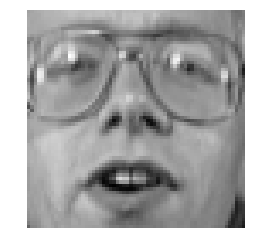

14


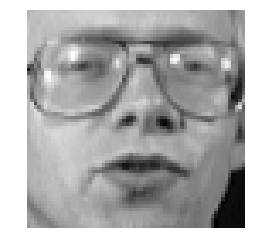

15


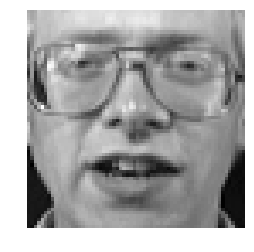

16


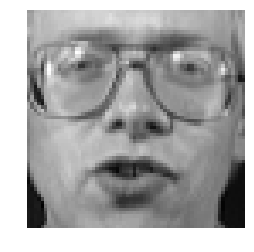

17


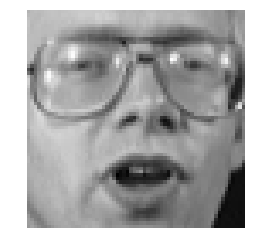

In [37]:
button_smile = Button(description='smile')
button_no_smile = Button(description='sad face')

def display_face(face):
    #clear_output()
    imshow(face, cmap='gray')
    axis('off')

def update_smile(b):
    trainer.record_result(smile=True)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

def update_no_smile(b):
    trainer.record_result(smile=False)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

button_no_smile.on_click(update_no_smile)
button_smile.on_click(update_smile)


display(button_smile)
display(button_no_smile)
display_face(trainer.imgs[trainer.index])

In [38]:
with open('results.xml', 'w') as f:
    json.dump(trainer.results, f)

In [39]:
results = json.load(open('results.xml'))

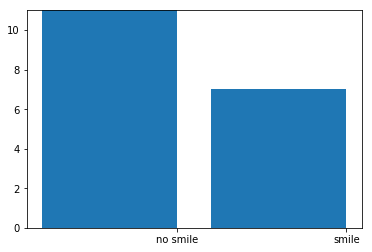

In [40]:
yes, no = (sum([results[x] == True for x in results]), 
            sum([results[x] == False for x in results]))
bar([0, 1], [no, yes])
ylim(0, max(yes, no))
xticks([0.4, 1.4], ['no smile', 'smile']);

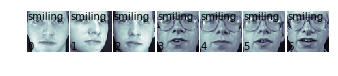

In [41]:
smiling_indices = [int(i) for i in results if results[i] == True]
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(smiling_indices)):
    # plot the images in a matrix of 20x20
    p = fig.add_subplot(20, 20, i + 1)
    p.imshow(faces.images[smiling_indices[i]], cmap=plt.cm.bone)
    
    # label the image with the target value
    p.text(0, 14, "smiling")
    p.text(0, 60, str(i))
    p.axis('off')

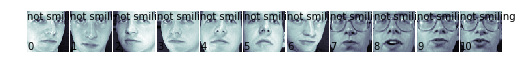

In [42]:
not_smiling_indices = [int(i) for i in results if results[i] == False]
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(not_smiling_indices)):
    # plot the images in a matrix of 20x20
    p = fig.add_subplot(20, 20, i + 1)
    p.imshow(faces.images[not_smiling_indices[i]], cmap=plt.cm.bone)

    # label the image with the target value
    p.text(0, 14, "not smiling")
    p.text(0, 60, str(i))
    p.axis('off')

In [43]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')

In [44]:
indices = [i for i in trainer.results]
results = list(map(int, indices))
data = faces.data[results, :]

In [45]:
target = [trainer.results[i] for i in trainer.results]
target = array(target).astype(int32)
target

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

In [46]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=0.25, random_state=0)

In [47]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(
        np.mean(scores), sem(scores)))

In [48]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[ 0.          0.          0.33333333  0.          0.        ]
Mean score: 0.067 (+/-0.067)


In [49]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [50]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.0
Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         4
          1       0.00      0.00      0.00         1

avg / total       0.00      0.00      0.00         5

Confusion Matrix:
[[0 4]
 [1 0]]


Button(description='New image!', style=ButtonStyle())

this person is smiling: [False]


/home/ghoneim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


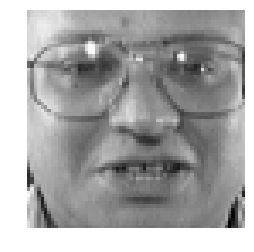

In [51]:
random_image_button = Button(description="New image!")

def display_face_and_prediction(b):
    index = randint(0, 400)
    face = faces.images[index]
    display_face(face)
    print("this person is smiling: {0}".format(svc_1.predict(faces.data[index, :])==1))

random_image_button.on_click(display_face_and_prediction)
display(random_image_button)
display_face_and_prediction(0)